# Prediction using Supervised ML
### (Level - Beginner)
### Submitted by Vipul Dass
### [Linked-in](https://www.linkedin.com/in/vipul-dass-94b82b9a/)


● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

● Sample Solution : https://bit.ly/2HxiGGJ


● Task submission:
1. Host the code on GitHub Repository (public). Record the code and
output in a video. Post the video on YouTube
2. Share links of code (GitHub) and video (YouTube) as a post on
YOUR LinkedIn profile, not TSF Network.
3. Submit the LinkedIn link in Task Submission Form when shared.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw = pd.read_csv('Student Scores.csv')
raw.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
raw.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- average hours studied is 5, going as low as 1.1 hours and upto 9.2. Median hours studied is 4.8

- Mean score attained is 51, going as low as 17 and as high as 95. Median score is 47

In [4]:
data = raw.copy()

In [5]:
#Correlation Matrix
x = data.corr()
x

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- Scores are highly correlated to hours studied

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

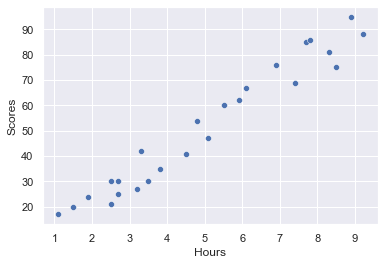

In [6]:
#Scatterplot for posterity. Confirms Correlation Matrox
sns.scatterplot(x = 'Hours', y = 'Scores', data = raw)

In [7]:
#define dependent and independent variables
x = data['Hours']
y = data['Scores']

In [8]:
#train_test_split
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [10]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [11]:
#Since Linear Regression object expects 2D array and x is 1D
import statsmodels.api as sm
x1 = sm.add_constant(x_train)
x2 = sm.add_constant(x_test)

In [12]:
x1

,const,Hours
22,1.0,3.8
17,1.0,1.9
24,1.0,7.8
23,1.0,6.9
14,1.0,1.1
1,1.0,5.1
10,1.0,7.7
13,1.0,3.3
8,1.0,8.3
6,1.0,9.2


In [13]:
#create Linear Regression object and predict
lm = LinearRegression()
lm.fit(x1,y_train)
yhat = lm.predict(x2)

### Coefficients

In [14]:
round(lm.intercept_,2)

2.02

In [15]:
np.round(lm.coef_,2)

array([0.  , 9.91])

- equation is : Score = 2.02 + 9.91*Hours

### Model Validation

In [16]:
check_preds = pd.DataFrame(yhat,y_test)
check_preds

,0
Scores,
20,16.884145
27,33.732261
69,75.357018
30,26.794801
62,60.491033


In [17]:
from sklearn import metrics
metrics.mean_absolute_error(yhat,y_test)

4.1838598990029725

# Prediction

In [18]:
dt = {'Const':[1],
     'Custom Input':[9.25]}
rand = pd.DataFrame(dt)
rand

,Const,Custom Input
0,1,9.25


In [19]:
custom_pred=lm.predict(rand)
custom_pred


array([93.69173249])